In [1]:
import json
from osgeo import gdal
import numpy as np
import os
from datetime import datetime
import random
from matplotlib import pyplot as plt

In [11]:
with open("data/dataset_train.json", "r") as f:
    testst = json.load(f)

indexes = random.sample(testst.keys(), 1000)

/var/folders/mm/pp6z4g_57wd5hg1w90myww1r0000gn/T/ipykernel_50277/1364984146.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  indexes = random.sample(testst.keys(), 1000)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'images' is your (N, 256, 256, 3) numpy array
# images = np.random.rand(N, 256, 256, 3)  # for example

# Compute the average pixel values across all the images.
# The result is a 3D array with shape (256, 256, 3).
average_image = np.mean(images, axis=0)

# Reshape the average image into a 1D array.
# The result is a 1D array with shape (256*256*3,).
average_pixels = average_image.reshape(-1)

# Create the histogram.
plt.hist(average_pixels, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Average Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [3]:
B02_min, B02_max = [], []
B03_min, B03_max = [], []
B04_min, B04_max = [], [] 
B05_min, B05_max = [], []
B06_min, B06_max = [], []
B07_min, B07_max = [], []
B08_min, B08_max = [], []

In [4]:
def value_ranges_repartition(pixel_array, range_size=1000, lower_percentile=5, upper_percentile=95):
    min_value, max_value = np.min(pixel_array), np.max(pixel_array)
    bins = np.arange(min_value, max_value + range_size, range_size)
    
    hist, _ = np.histogram(pixel_array, bins=bins)
    repartition = dict(zip(bins[:-1], hist))
    
    total_pixels = pixel_array.size
    percentages = {k: (v / total_pixels) * 100 for k, v in repartition.items()}
    
    lower_threshold = np.percentile(pixel_array, lower_percentile)
    upper_threshold = np.percentile(pixel_array, upper_percentile)
    
    # min_population_range = min(repartition, key=repartition.get)
    # max_population_range = max(repartition, key=repartition.get)
    
    # print("Histogram:")
    # for k, v in percentages.items():
    #     print(f"Range: {k}-{k + range_size - 1}, Percentage: {v:.2f}%")
    
    # print("5% threshold:", lower_threshold)
    # print("95% threshold:", upper_threshold)
    
    return lower_threshold, upper_threshold


In [22]:
os.chdir("/Users/thomashebrard/thesis/code/project/pix2pix")
from src.dataset.make_dataset import DataLoader
os.chdir("/Users/thomashebrard/thesis/code/preprocess")

data_loader = DataLoader()
imgs_A, imgs_B = zip( 
    *data_loader.load_batch(batch_size=20
    )
)

1312


In [31]:
with open(
    "/Users/thomashebrard/thesis/code/preprocess/data/dataset_train.json",
    "r",
) as f:
    dataset_train = json.load(f)
with open(
    "/Users/thomashebrard/thesis/code/preprocess/data/dataset_test.json",
    "r",
) as f:
    dataset_test = json.load(f)

dataset_train_keys = list(dataset_train.keys())

In [53]:
def load_batch(bands=["B04", "B03", "B02"], batch_size=1, is_testing=False):
    batched_data = []
    dataset = {}
    if is_testing:
        dataset = dataset_test
        keys = list(dataset.keys())
    else:
        dataset = dataset_train
        keys = dataset_train_keys

    np.random.shuffle(keys)

    data_keys = keys[:batch_size]

    n_batches = int(len(list(keys)) / batch_size)

    os.chdir("/Users/thomashebrard/thesis/code/preprocess/")
    i = 0
    for k in data_keys:
        i+=1
        s1_hv = gdal.Open(dataset[k]["s1_hv"]).ReadAsArray()
        s1_vv = gdal.Open(dataset[k]["s1_vv"]).ReadAsArray()

        s2_cloudy = {
            band: gdal.Open(dataset[k][f"s2_cloudy_{band}"]).ReadAsArray()
            for band in bands
        }
        s2_cloudfree = {
            band: gdal.Open(dataset[k][f"s2_cloud_free_{band}"]).ReadAsArray()
            for band in ["B04", "B03", "B02"]
        }
        input = np.stack(
            (
                s1_hv,
                s1_vv,
                s2_cloudy["B04"],
                s2_cloudy["B03"],
                s2_cloudy["B02"],
            ),
            axis=-1,
        )
        ground_truth = np.stack(
                (s2_cloudfree["B04"], s2_cloudfree["B03"], s2_cloudfree["B02"]),
                axis=-1,
            )
        batched_data.append((ground_truth, input))
    return batched_data


In [60]:
imgs_A, imgs_B = zip( 
    *load_batch(batch_size=50)
)
imgs_B = np.array(imgs_B)

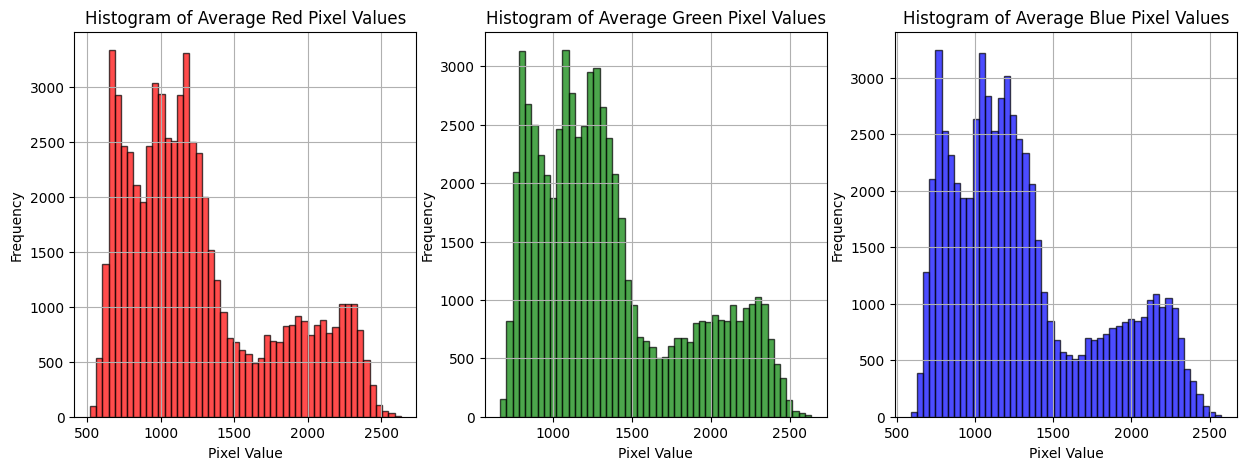

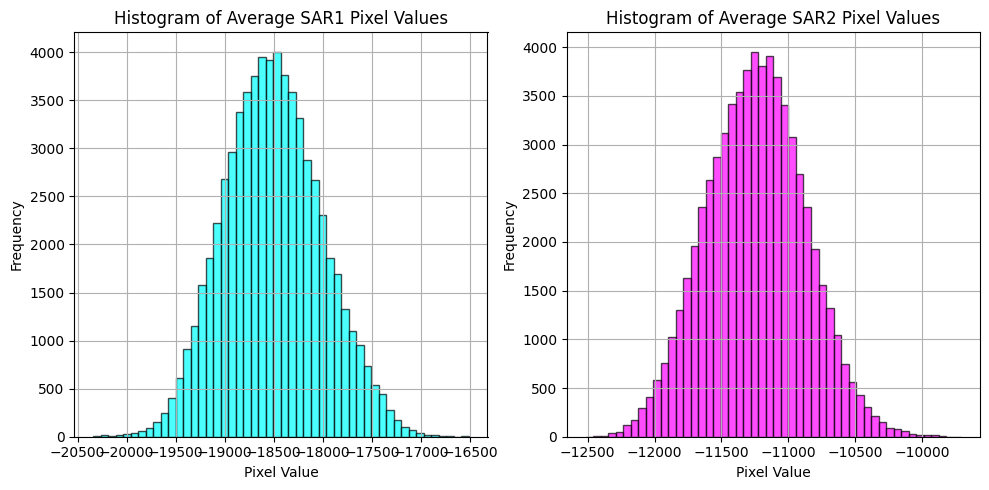

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'images' is your (N, 256, 256, 3) numpy array
# images = np.random.rand(N, 256, 256, 3)  # for example

# Compute the average pixel values across all the images.
average_image = np.mean(imgs_B, axis=0)

# Separate the average pixel values by color channel.
sar1_pixels = average_image[:,:,0].reshape(-1) 
sar2_pixels = average_image[:,:,1].reshape(-1)
blue_pixels = average_image[:,:,2].reshape(-1)
green_pixels = average_image[:,:,3].reshape(-1)
red_pixels = average_image[:,:,4].reshape(-1)

# Create the histograms.

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(red_pixels, bins=50, color='red', alpha=0.7, edgecolor='black')
plt.title('Histogram of Average Red Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.hist(green_pixels, bins=50, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Average Green Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.hist(blue_pixels, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Average Blue Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("histor_rgb_after.png")
plt.show()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(sar1_pixels, bins=50, color='cyan', alpha=0.7, edgecolor='black')
plt.title('Histogram of Average SAR1 Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(sar2_pixels, bins=50, color='magenta', alpha=0.7, edgecolor='black')
plt.title('Histogram of Average SAR2 Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.savefig("histor_sar_after.png")
plt.tight_layout()
plt.show()

In [21]:
for i in indexes[:20]:
    data = testst[str(i)]
    B02_l, B02_u = value_ranges_repartition(gdal.Open(data["s2_cloudy_B02"]).ReadAsArray())
    B02_min.append(B02_l)
    B02_max.append(B02_u)

    B03_l, B03_u = value_ranges_repartition(gdal.Open(data["s2_cloudy_B03"]).ReadAsArray())
    B03_min.append(B03_l)
    B03_max.append(B03_u)

    B04_l, B04_u = value_ranges_repartition(gdal.Open(data["s2_cloudy_B04"]).ReadAsArray())
    B04_min.append(B04_l)
    B04_max.append(B04_u)

    B05_l, B05_u = value_ranges_repartition(gdal.Open(data["s2_cloudy_B05"]).ReadAsArray())
    B05_min.append(B05_l)
    B05_max.append(B05_u)

    B06_l, B06_u = value_ranges_repartition(gdal.Open(data["s2_cloudy_B06"]).ReadAsArray())
    B06_min.append(B06_l)
    B06_max.append(B06_u)

    B07_l, B07_u = value_ranges_repartition(gdal.Open(data["s2_cloudy_B07"]).ReadAsArray())
    B07_min.append(B07_l)
    B07_max.append(B07_u)
    
    # B08_l, B08_u = value_ranges_repartition(gdal.Open(data["s2_cloudy_B08"]).ReadAsArray())
    # B08_min.append(B08_l)
    # B08_max.append(B08_u)



In [22]:
print("B02", np.mean(B02_min), np.mean(B02_max))
print("B03", np.mean(B03_min), np.mean(B03_max))
print("B04", np.mean(B04_min), np.mean(B04_max))
print("B05", np.mean(B05_min), np.mean(B05_max))
print("B06", np.mean(B06_min), np.mean(B06_max))
print("B07", np.mean(B07_min), np.mean(B07_max))

B02 361.06756756756755 5028.4324324324325
B03 435.5945945945946 4868.648648648648
B04 310.4054054054054 4789.0
B05 572.9444444444445 5336.805555555556
B06 1148.7222222222222 5941.611111111111
B07 1309.1944444444443 6208.305555555556


In [75]:
B02 = gdal.Open(testst[str(1733)]["s2_cloudy_B02"]).ReadAsArray()
B03 = gdal.Open(testst[str(1733)]["s2_cloudy_B03"]).ReadAsArray()
B04 = gdal.Open(testst[str(1733)]["s2_cloudy_B04"]).ReadAsArray()

In [98]:
im = np.stack((B04, B03, B02), axis=-1)
clipped_B02 = np.clip(B02, 200, 4580)
clipped_B03 = np.clip(B03, 200, 4580)
clipped_B04 = np.clip(B04, 200, 4580)

In [99]:
cim = np.array(np.stack((clipped_B04, clipped_B03, clipped_B02), axis=-1))